In [8]:
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.signal as signal
import pickle

plt.rcParams['font.sans-serif']=['SimSun'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def smooth(data):
    # tmp = scipy.signal.savgol_filter(data, 53, 3)
    tmp = signal.savgol_filter(data, 99, 3)
    return tmp

[-0.01976424 -0.01793768 -0.02000466 -0.01785365 -0.01534999 -0.01354503
 -0.01516482 -0.0188064  -0.01919718 -0.01885675 -0.01107625 -0.02030611
 -0.01762493 -0.0098184  -0.01823978 -0.02128854 -0.01928727 -0.02121853
 -0.01986516 -0.01974261 -0.02183995 -0.01411226 -0.01456741 -0.01251308
 -0.01654144 -0.01463619 -0.01316108 -0.01427085 -0.01865727 -0.01656981
 -0.01870896 -0.01965568 -0.01935172 -0.02022666 -0.0187956  -0.01887874
 -0.01853139 -0.01988111 -0.01948341 -0.01947448]
20000
20000
20000
20000


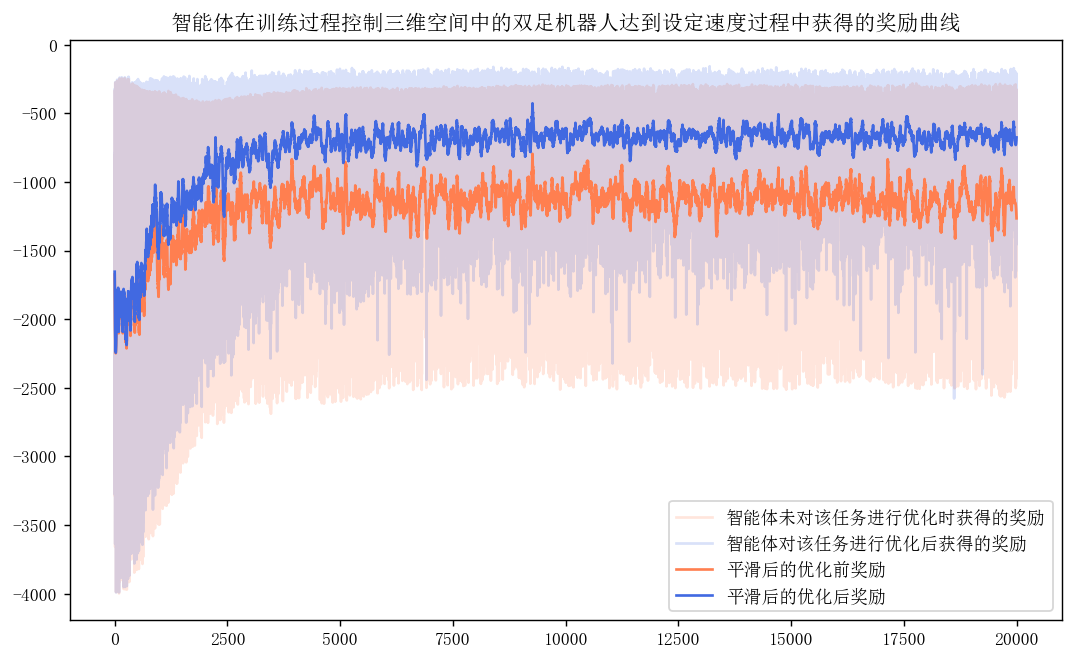

In [14]:
file = 'history.pkl'

with open(file, 'rb')as f:
    hist = pickle.load(f)
    
print (hist[0]['loss_after'])

batch_num = len(hist.keys())

loss_before = []
loss_after = []
train_returns = []
valid_returns = []

for i in range(batch_num):
    batch_data = hist[i]
    tr_returns = [np.sum(task) for task in batch_data['train_returns']]
    train_returns.extend(tr_returns)
    
    val_returns = [np.sum(task) for task in batch_data['valid_returns']]
    valid_returns.extend(val_returns)
    
    loss_bef = [np.mean(task) for task in batch_data['loss_before']]
    loss_before.extend(loss_bef)
    
    loss_aft = [np.mean(task) for task in batch_data['loss_after']]
    loss_after.extend(loss_aft)
print (len(train_returns))
print (len(valid_returns))

print (len(loss_before))
print (len(loss_after))

smooth_tra_returns = smooth(train_returns)
smooth_val_returns = smooth(valid_returns)

smooth_loss_bef = smooth(loss_before)
smooth_loss_aft = smooth(loss_after)

fig = plt.figure(dpi=128, figsize=(10,6))
plt.title('智能体在训练过程控制三维空间中的双足机器人达到设定速度过程中获得的奖励曲线')
plt.plot(train_returns, alpha=0.2, color='coral', label='智能体未对该任务进行优化时获得的奖励')
plt.plot(valid_returns, alpha=0.2, color='royalblue',label='智能体对该任务进行优化后获得的奖励')
plt.plot(smooth_tra_returns, color='coral', label='平滑后的优化前奖励')
plt.plot(smooth_val_returns, color='royalblue', label='平滑后的优化后奖励')
plt.legend(loc='lower right')
plt.savefig('train-process-rewards.png')
plt.show()


['tasks', 'train_returns', 'valid_returns']
200
200
[ -87.66585   -85.958786  -87.63503   -88.27631   -88.12881   -86.59552
  -97.147766  -89.8493    -91.33955   -92.03334   -90.476974  -90.89235
  -92.42144   -84.89456   -87.57289  -100.08138   -94.52251   -90.601875
  -87.14814   -94.274895]
[-45.69967  -44.798294 -50.851143 -53.858128 -48.630856 -44.703915
 -46.71544  -55.955574 -53.65676  -47.040672 -43.085934 -72.82583
 -48.501602 -55.576786 -50.011116 -46.885036 -48.434807 -41.976894
 -48.744743 -48.16897 ]
[ -87.66585   -85.958786  -87.63503   -88.27631   -88.12881   -86.59552
  -97.147766  -89.8493    -91.33955   -92.03334   -90.476974  -90.89235
  -92.42144   -84.89456   -87.57289  -100.08138   -94.52251   -90.601875
  -87.14814   -94.274895]
[-39.56425  -34.92267  -32.5344   -27.919973 -27.691347 -36.785954
 -32.53146  -31.915623 -35.072712 -33.672916 -40.510963 -30.882336
 -32.8021   -28.578802 -32.780483 -35.21467  -34.713337 -27.911442
 -30.810244 -33.115078]
[-38.39585  -

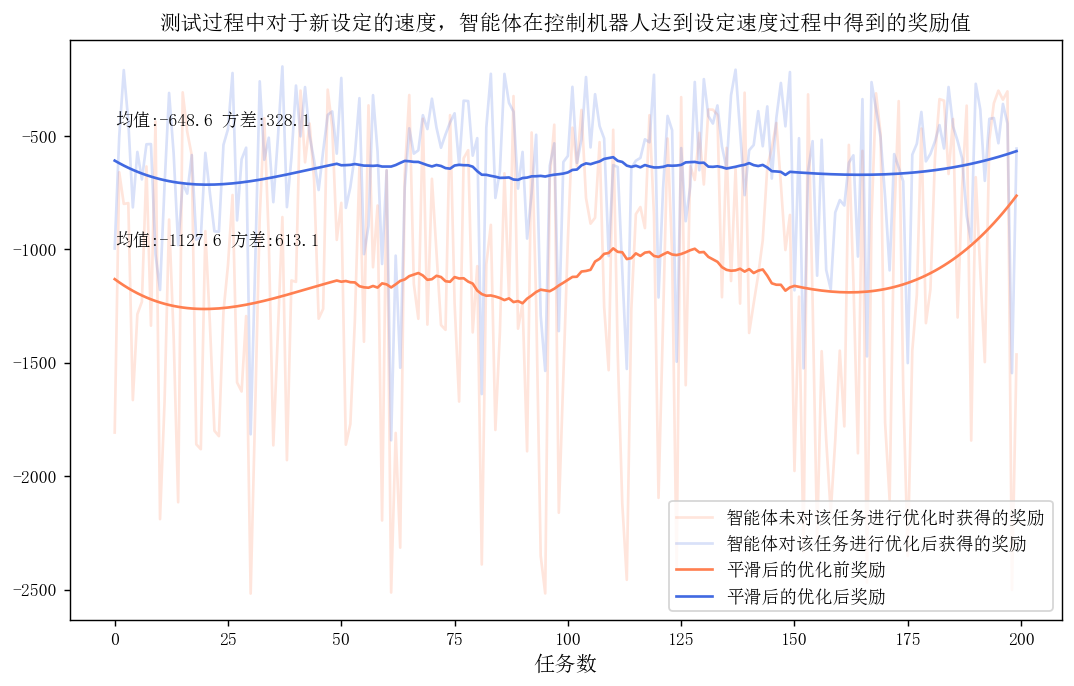

In [16]:
# load test result
result = np.load('results.npz')
print (result.files)
print (len(result['tasks']))
test_rewards_before = result['train_returns']
test_rewards_after = result['valid_returns']
print (len(test_rewards_before))
print (test_rewards_before[0])
print (test_rewards_after[0])


test_reward_before = []
test_reward_after = []
for i in range(200):
    print (test_rewards_before[i])
    test_tra_return = np.sum(test_rewards_before[i])
    test_reward_before.append(test_tra_return)
    
    test_val_return = np.sum(test_rewards_after[i])
    test_reward_after.append(test_val_return)

print(np.mean(test_reward_before))
print(np.mean(test_reward_after))

smooth_test_bef = smooth(test_reward_before)
smooth_test_aft = smooth(test_reward_after)


# @TODO
# 小数点后保留两位小数

fig = plt.figure(dpi=128, figsize=(10,6))
plt.title('测试过程中对于新设定的速度，智能体在控制机器人达到设定速度过程中得到的奖励值')
plt.plot(test_reward_before, alpha=0.2, color='coral', label='智能体未对该任务进行优化时获得的奖励')
plt.plot(test_reward_after, alpha=0.2, color='royalblue',label='智能体对该任务进行优化后获得的奖励')
plt.plot(smooth_test_bef, color='coral', label='平滑后的优化前奖励')
plt.plot(smooth_test_aft, color='royalblue', label='平滑后的优化后奖励')
plt.text(0, -980, "均值:{} 方差:{}".format(-1127.6, 613.1, '.2f'), size = 10, alpha = 1, wrap=True)
plt.text(0, -450, "均值:{} 方差:{}".format(-648.6, 328.1, '.2f'), size = 10, alpha = 1, wrap=True)
plt.xlabel('任务数', fontsize=12)
plt.legend(loc='lower right')
plt.savefig('test-process-rewards.png')
plt.show()